In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans

In [23]:
# Load the dataset
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
# Checck for null values
null_values = df.isnull().sum()
null_values

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [25]:
# Selecting numerical columns
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                  'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

# Calculating summary statistics
summary_stats = df[numerical_cols].describe()

In [26]:
# Calculating mode separately because describe() doesn't include mode
mode_stats = df[numerical_cols].mode().iloc[0]

# Adding mode to summary statistics
summary_stats.loc['mode'] = mode_stats

# Printing summary statistics
print(summary_stats)

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   
mode         2.000000     4.000000                         10.800000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456             

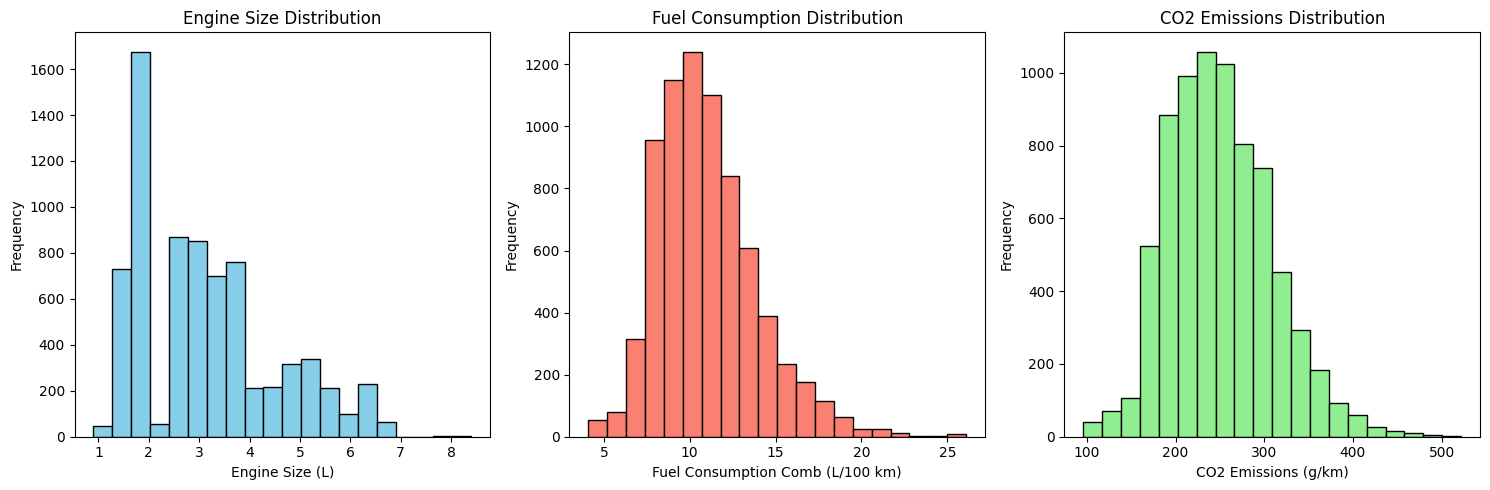

In [27]:
# Create a figure and axis object
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for Engine Size, Fuel Consumption, and CO2 Emissions
axs[0].hist(df['Engine Size(L)'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Engine Size Distribution')
axs[0].set_xlabel('Engine Size (L)')
axs[0].set_ylabel('Frequency')

axs[1].hist(df['Fuel Consumption Comb (L/100 km)'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Fuel Consumption Distribution')
axs[1].set_xlabel('Fuel Consumption Comb (L/100 km)')
axs[1].set_ylabel('Frequency')

axs[2].hist(df['CO2 Emissions(g/km)'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('CO2 Emissions Distribution')
axs[2].set_xlabel('CO2 Emissions (g/km)')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

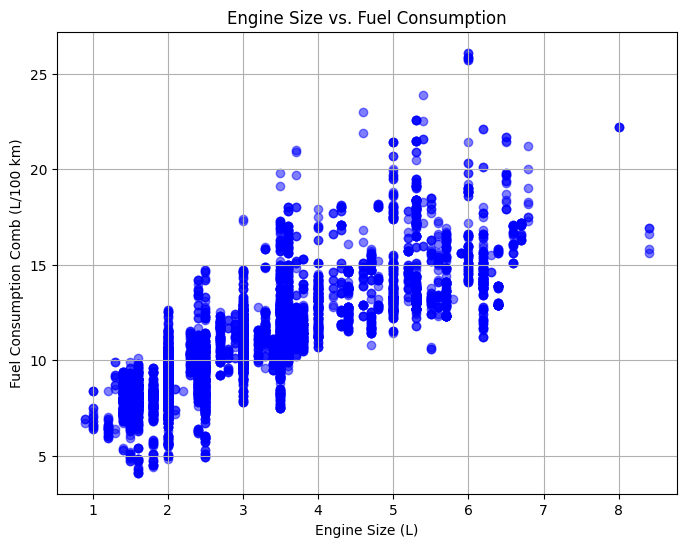

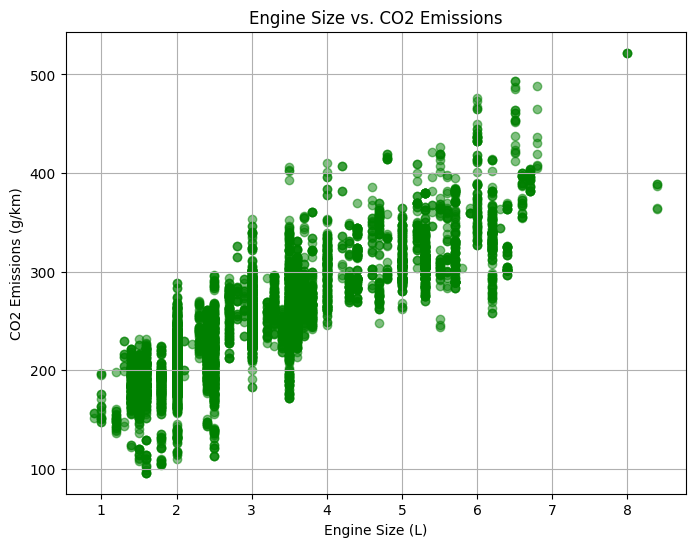

In [28]:
# Create a scatter plot for Engine Size vs. Fuel Consumption
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'], color='blue', alpha=0.5)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.grid(True)
plt.show()

# Create a scatter plot for Engine Size vs. CO2 Emissions
plt.figure(figsize=(8, 6))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], color='green', alpha=0.5)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

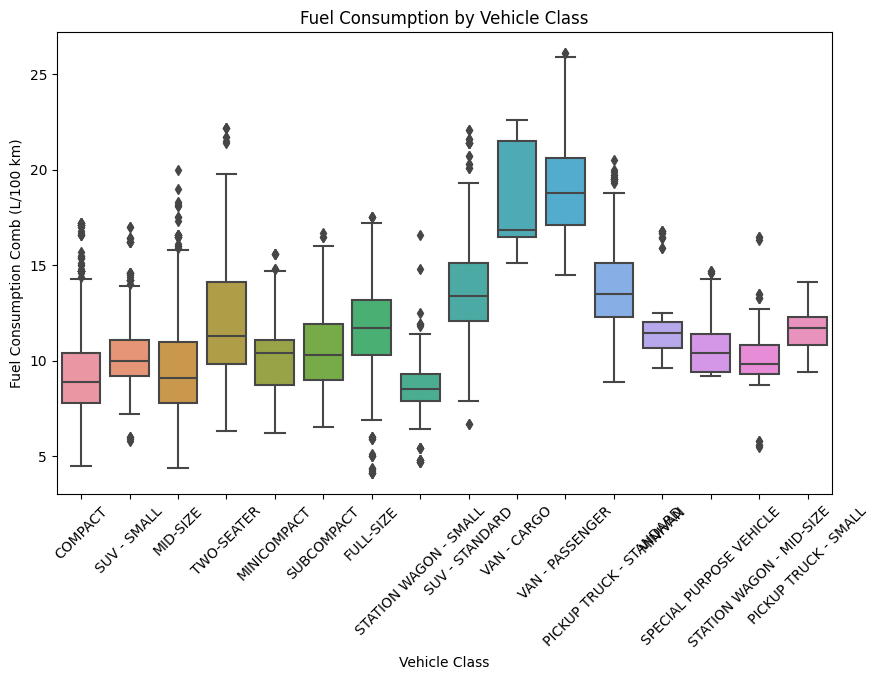

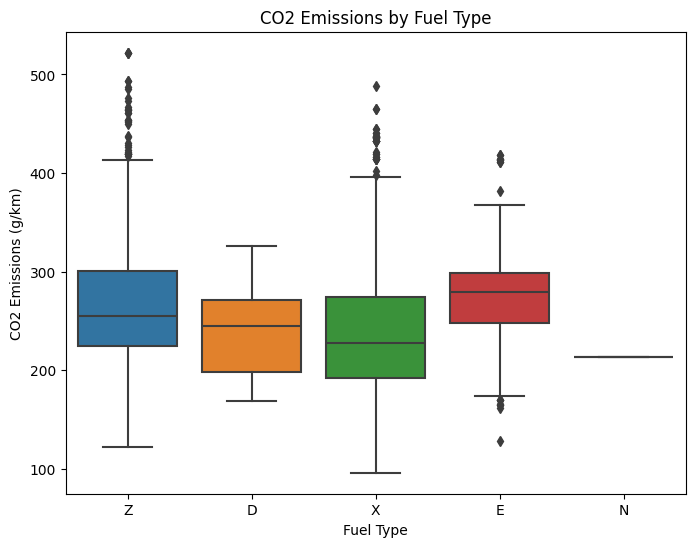

In [29]:
# Create box plot for Fuel Consumption across different vehicle classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Fuel Consumption Comb (L/100 km)')
plt.xticks(rotation=45)
plt.show()

# Create box plot for CO2 Emissions across different fuel types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

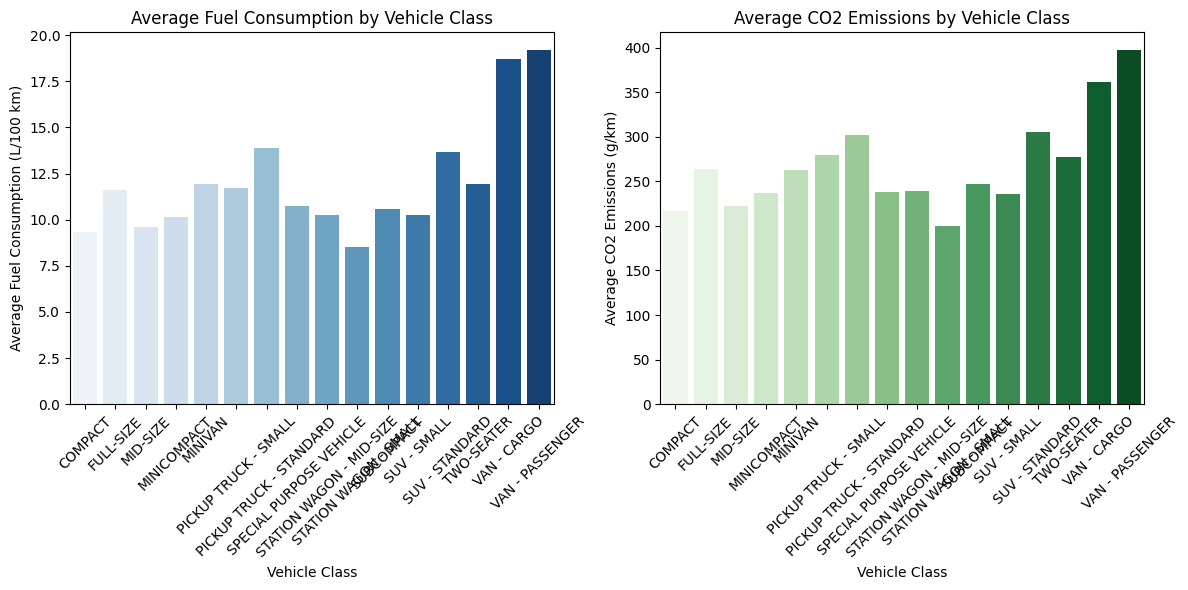

In [30]:
# Calculate average fuel consumption and CO2 emissions by vehicle class
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

# Create bar plots for average fuel consumption and CO2 emissions by vehicle class using Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=avg_fuel_consumption_class, palette='Blues')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=avg_co2_emissions_class, palette='Greens')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [31]:
# Selecting the relevant columns for correlation analysis
correlation_cols = ['Engine Size(L)', 'Cylinders', 
                    'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Calculating Pearson correlation coefficients
correlation_matrix = df[correlation_cols].corr()

# Print correlation matrix
print("Pearson correlation coefficients:")
print(correlation_matrix)

Pearson correlation coefficients:
                                  Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption Comb (L/100 km)  \
Engine Size(L)                                            0.817060   
Cylinders                                                 0.780534   
Fuel Consumption Comb (L/100 km)                          1.000000   
CO2 Emissions(g/km)                                       0.918052   

                                  CO2 Emissions(g/km)  
Engine Size(L)                               0.851145  
Cylinders                                    0.832644  
Fuel Consumption Comb (L/100 km)             0.918052  
CO2 Emissions(g/km)                          1.000000  


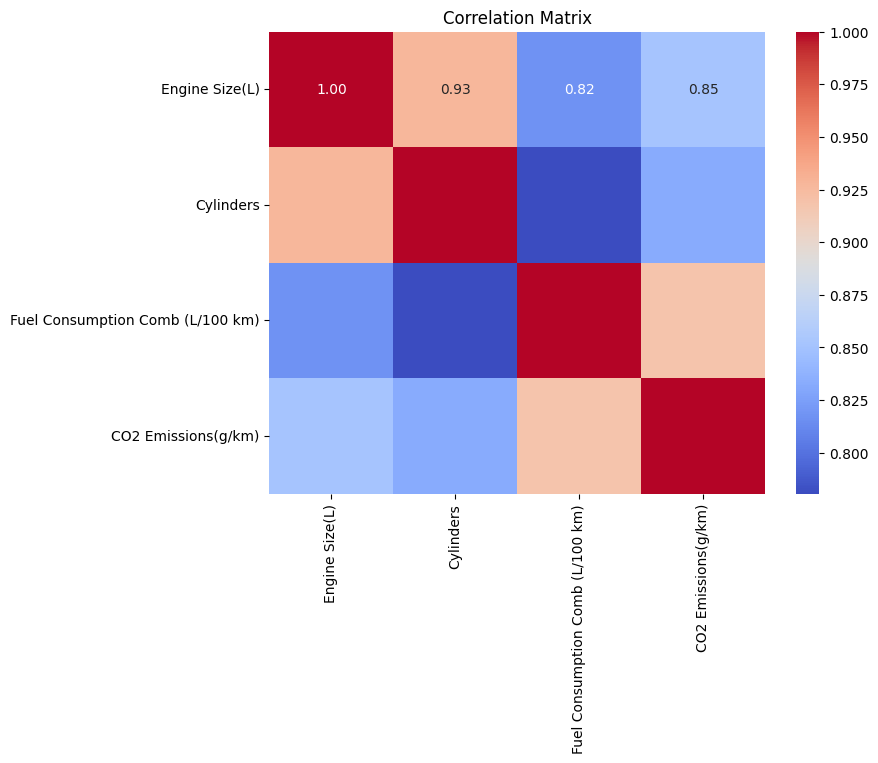

In [32]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

c:\Users\UK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\UK\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

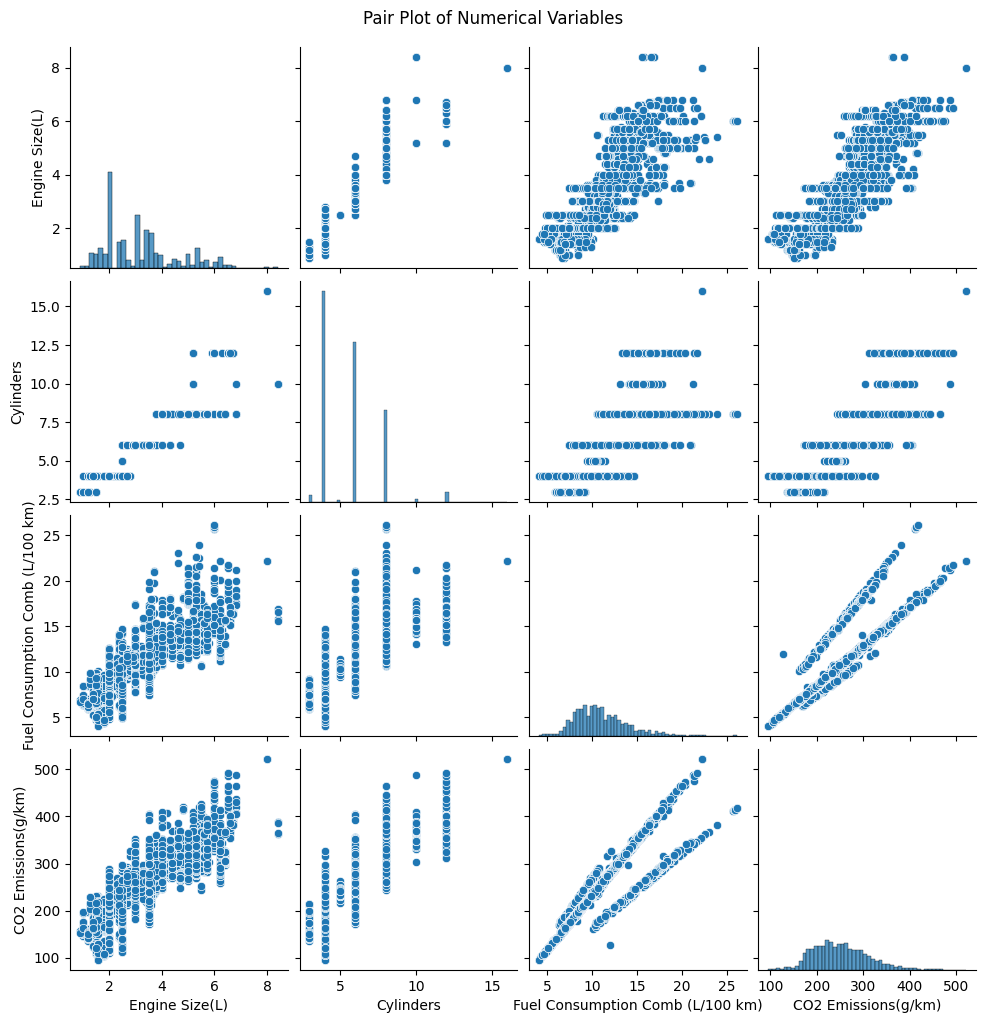

In [33]:
# Selecting numerical columns for pair plot
numerical_cols = ['Engine Size(L)', 'Cylinders', 
                  'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']

# Create pair plot
sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

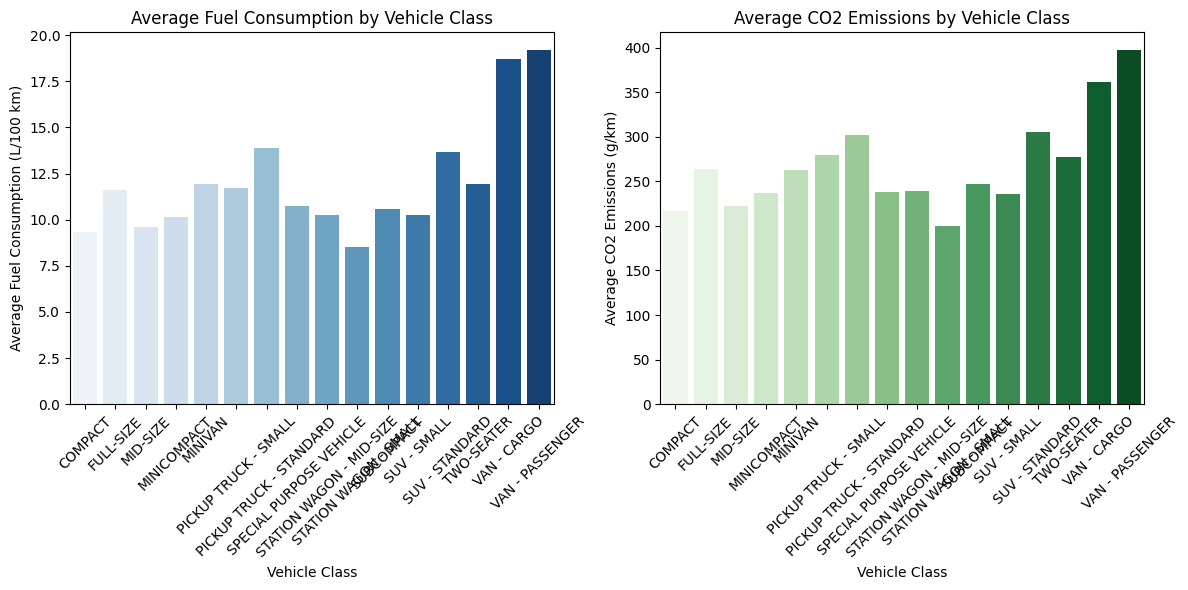

In [34]:
# Calculate average fuel consumption and CO2 emissions by vehicle class
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean().reset_index()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()

# Create bar plots for average fuel consumption and CO2 emissions by vehicle class
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)', data=avg_fuel_consumption_class, palette='Blues')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=avg_co2_emissions_class, palette='Greens')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


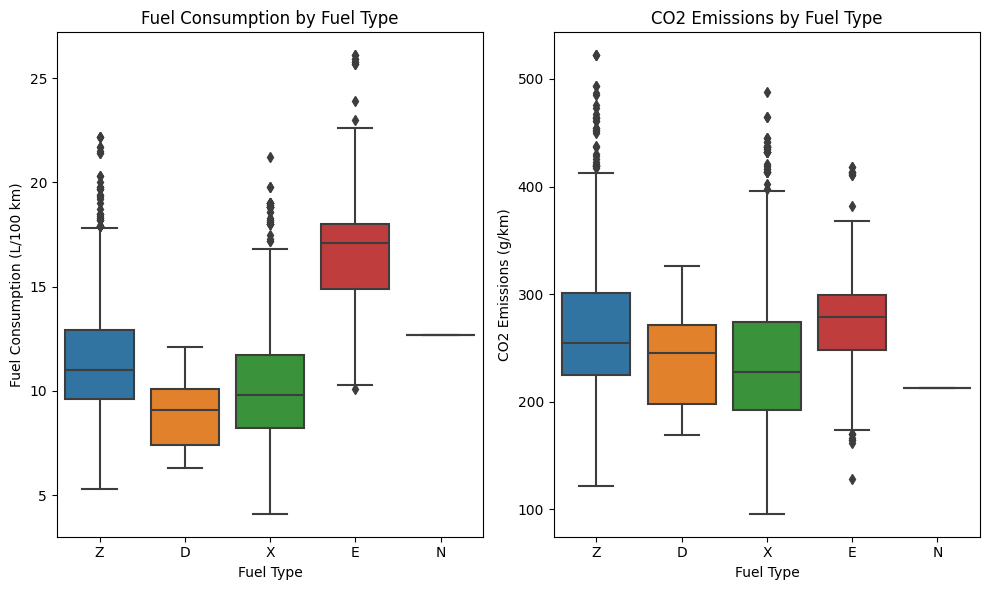

In [35]:
# Create box plots for fuel consumption and CO2 emissions by fuel type
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

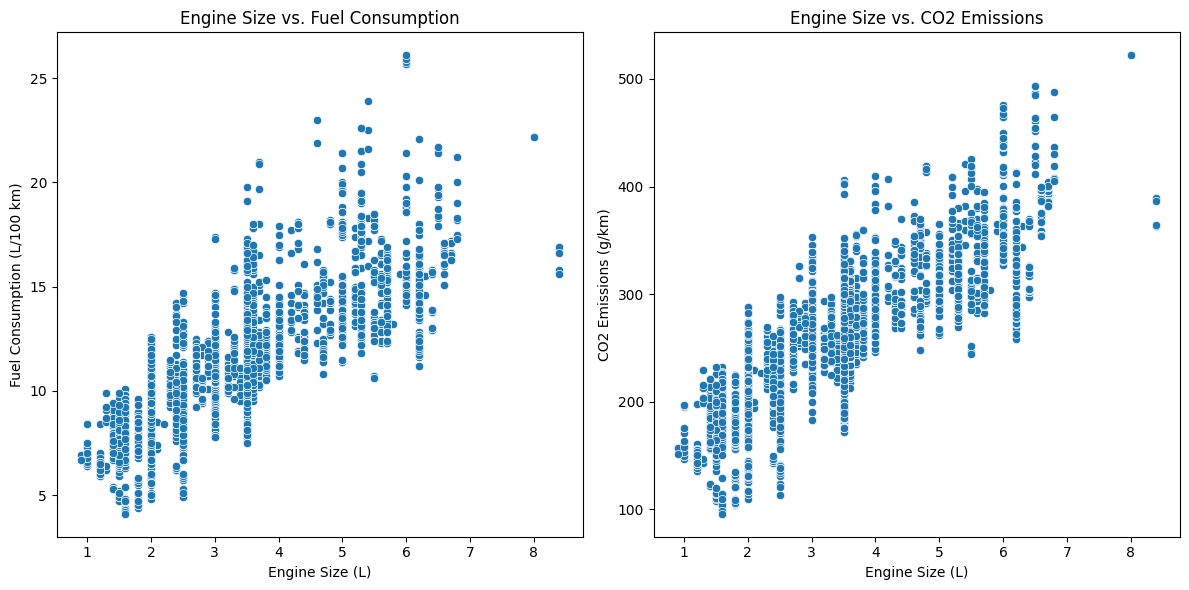

In [36]:
# Create scatter plots for Engine Size vs. Fuel Consumption and CO2 Emissions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', data=df)
plt.title('Engine Size vs. Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')

plt.tight_layout()
plt.show()

In [37]:
# Selecting predictor variables (features) and target variable
X = df[['Engine Size(L)', 'Cylinders']]  # Features: Engine Size and Cylinder Count
y = df['Fuel Consumption Comb (L/100 km)']  # Target variable: Fuel Consumption

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2.792672389925513
R-squared Score: 0.669576711692369


In [38]:
# Selecting predictor variables (features) and target variable
X = df[['Engine Size(L)', 'Cylinders']]  # Features: Engine Size and Cylinder Count
y = df['CO2 Emissions(g/km)']  # Target variable: CO2 Emissions

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 913.1230985876683
R-squared Score: 0.734528485634979


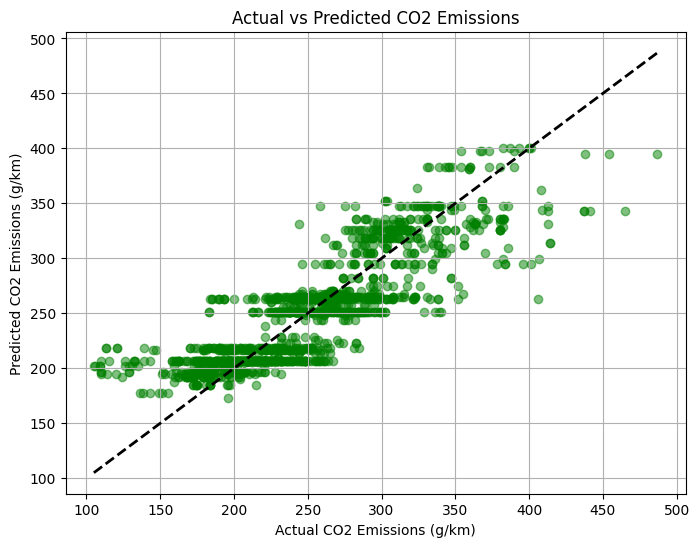

In [39]:
# Plotting actual vs predicted CO2 emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

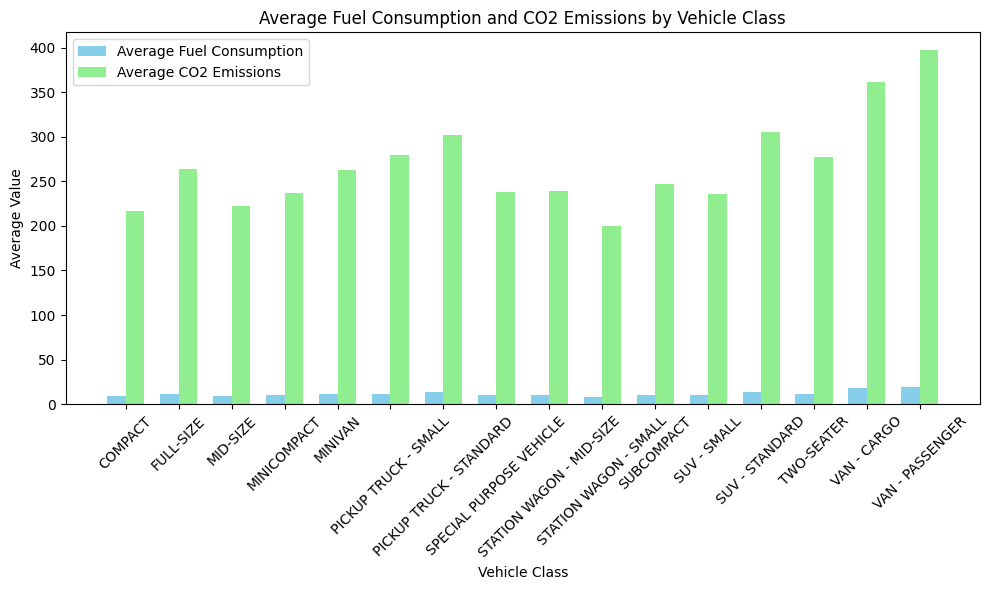

In [40]:
# Group by vehicle class and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_class = df.groupby('Vehicle Class')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()

# Get the position of each vehicle class
x = range(len(avg_fuel_consumption_class))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, avg_fuel_consumption_class, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_class, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Vehicle Class')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Vehicle Class')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_class.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

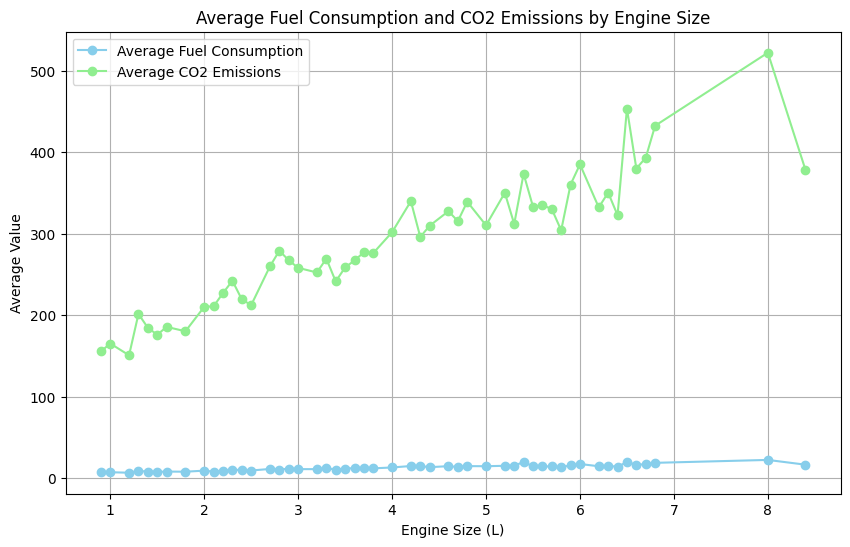

In [41]:
# Group by engine size and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_engine = df.groupby('Engine Size(L)')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_engine = df.groupby('Engine Size(L)')['CO2 Emissions(g/km)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_fuel_consumption_engine.index, avg_fuel_consumption_engine, marker='o', label='Average Fuel Consumption', color='skyblue')
plt.plot(avg_co2_emissions_engine.index, avg_co2_emissions_engine, marker='o', label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Engine Size')
plt.legend()
plt.grid(True)
plt.show()


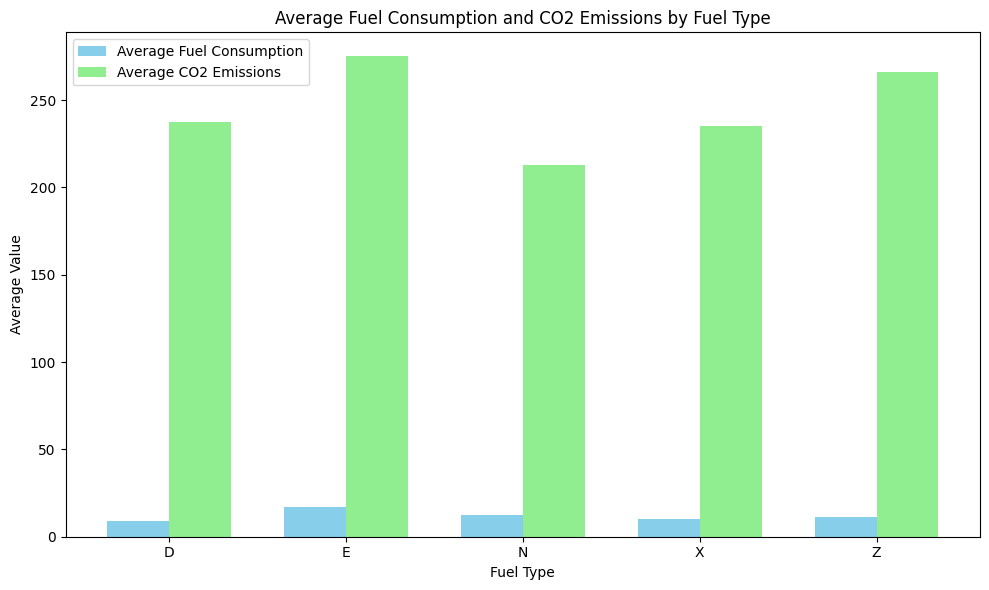

In [42]:
# Group by fuel type and calculate average fuel consumption and CO2 emissions
avg_fuel_consumption_fuel = df.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean()
avg_co2_emissions_fuel = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

# Get the position of each fuel type
x = range(len(avg_fuel_consumption_fuel))

# Define the width of each bar
width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, avg_fuel_consumption_fuel, width, label='Average Fuel Consumption', color='skyblue')
plt.bar([i + width for i in x], avg_co2_emissions_fuel, width, label='Average CO2 Emissions', color='lightgreen')
plt.xlabel('Fuel Type')
plt.ylabel('Average Value')
plt.title('Average Fuel Consumption and CO2 Emissions by Fuel Type')
plt.xticks([i + width/2 for i in x], avg_fuel_consumption_fuel.index)
plt.legend()
plt.tight_layout()
plt.show()

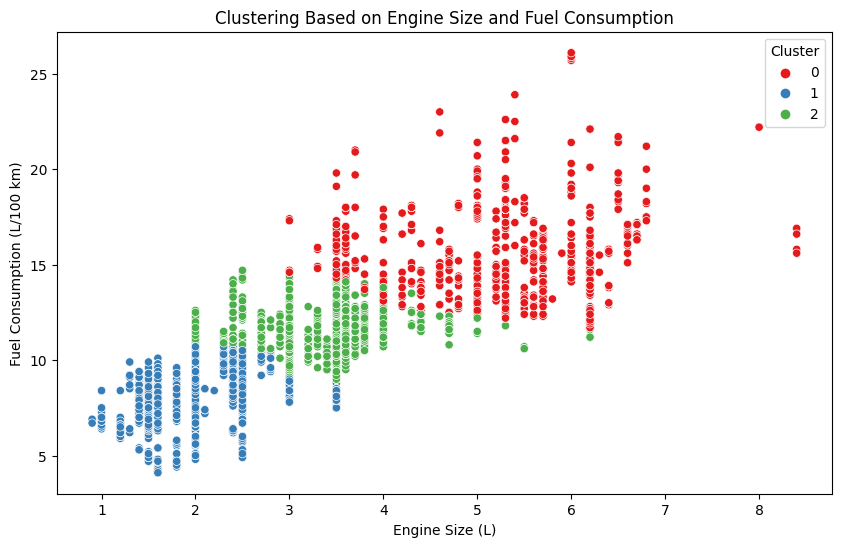

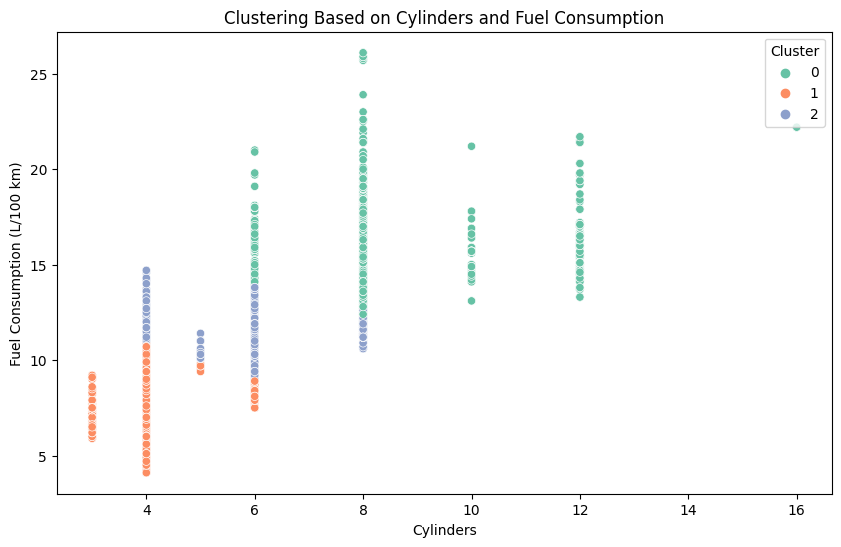

In [43]:
# Selecting features for clustering
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']

# Extracting features from the dataset
X = df[features]

# Choosing the number of clusters (you can change this value based on your requirements)
num_clusters = 3

# Initializing K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fitting K-means to the data
kmeans.fit(X)

# Assigning cluster labels to each data point
df['Cluster'] = kmeans.labels_

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine Size(L)', y='Fuel Consumption Comb (L/100 km)', hue='Cluster', data=df, palette='Set1')
plt.title('Clustering Based on Engine Size and Fuel Consumption')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cylinders', y='Fuel Consumption Comb (L/100 km)', hue='Cluster', data=df, palette='Set2')
plt.title('Clustering Based on Cylinders and Fuel Consumption')
plt.xlabel('Cylinders')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()

Inferential statistics

In [44]:
from scipy.stats import ttest_ind

# Separate data by engine size
small_engine = df[df['Engine Size(L)'] < 2.0]['CO2 Emissions(g/km)']
large_engine = df[df['Engine Size(L)'] >= 2.0]['CO2 Emissions(g/km)']

# Perform t-test for CO2 emissions
test_stat, p_value = ttest_ind(small_engine, large_engine)

# Print results
print("T-test for CO2 Emissions based on Engine Size:")
print("Test Statistic:", test_stat)
print("P-value:", p_value)


T-test for CO2 Emissions based on Engine Size:
Test Statistic: -45.66304082053451
P-value: 0.0


Average Fuel Consumption for Different Vehicle Classes

ANOVA and Post-hoc Tests:

In [48]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA for Fuel Consumption by Vehicle Class
anova_results = f_oneway(df['Fuel Consumption Comb (L/100 km)'][df['Vehicle Class'] == 'COMPACT'],
                         df['Fuel Consumption Comb (L/100 km)'][df['Vehicle Class'] == 'SUV'])

# Print ANOVA results
print("ANOVA for Fuel Consumption by Vehicle Class:")
print("F-statistic:", anova_results.statistic)
print("P-value:", anova_results.pvalue)

# Conduct Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(df['Fuel Consumption Comb (L/100 km)'], df['Vehicle Class'])

# Print post-hoc test results
print("\nTukey's HSD Post-hoc Test:")
print(tukey_results)


c:\Users\UK\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


ANOVA for Fuel Consumption by Vehicle Class:
F-statistic: nan
P-value: nan

Tukey's HSD Post-hoc Test:
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
                 COMPACT                FULL-SIZE   2.2897    0.0  1.8971  2.6823   True
                 COMPACT                 MID-SIZE   0.2654 0.3247 -0.0704  0.6012  False
                 COMPACT              MINICOMPACT   0.8248    0.0  0.3297  1.3199   True
                 COMPACT                  MINIVAN   2.5911    0.0  1.6874  3.4948   True
                 COMPACT     PICKUP TRUCK - SMALL   2.3737    0.0  1.7101  3.0373   True
                 COMPACT  PICKUP TRUCK - STANDARD   4.5369    0.0  4.1223  4.9515   True
                 COMPACT  SPECIAL PURPOSE VEHICLE   1.4197    0.0  0.4998  2.3396   True
       

Effect of Different Fuel Types:
ANOVA and Post-hoc Tests:

In [46]:
# Perform ANOVA for Fuel Consumption and CO2 Emissions by Fuel Type
anova_fuel_consumption = f_oneway(df['Fuel Consumption Comb (L/100 km)'][df['Fuel Type'] == 'Z'],
                                  df['Fuel Consumption Comb (L/100 km)'][df['Fuel Type'] == 'X'])

anova_co2_emissions = f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'],
                               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'])

# Print ANOVA results
print("ANOVA for Fuel Consumption by Fuel Type:")
print("F-statistic:", anova_fuel_consumption.statistic)
print("P-value:", anova_fuel_consumption.pvalue)

print("\nANOVA for CO2 Emissions by Fuel Type:")
print("F-statistic:", anova_co2_emissions.statistic)
print("P-value:", anova_co2_emissions.pvalue)

# Conduct Tukey's HSD post-hoc tests
tukey_fuel_consumption = pairwise_tukeyhsd(df['Fuel Consumption Comb (L/100 km)'], df['Fuel Type'])
tukey_co2_emissions = pairwise_tukeyhsd(df['CO2 Emissions(g/km)'], df['Fuel Type'])

# Print post-hoc test results
print("\nTukey's HSD Post-hoc Test for Fuel Consumption:")
print(tukey_fuel_consumption)

print("\nTukey's HSD Post-hoc Test for CO2 Emissions:")
print(tukey_co2_emissions)


ANOVA for Fuel Consumption by Fuel Type:
F-statistic: 507.43217576891277
P-value: 1.8781239670757634e-108

ANOVA for CO2 Emissions by Fuel Type:
F-statistic: 499.93738878356817
P-value: 6.201884221550652e-107

Tukey's HSD Post-hoc Test for Fuel Consumption:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     D      E   8.0259    0.0  7.4104  8.6415   True
     D      N   3.8646 0.5187 -2.8642 10.5933  False
     D      X   1.2491    0.0  0.7299  1.7684   True
     D      Z   2.5873    0.0  2.0665  3.1082   True
     E      N  -4.1614 0.4402  -10.88  2.5573  False
     E      X  -6.7768    0.0 -7.1429 -6.4106   True
     E      Z  -5.4386    0.0  -5.807 -5.0702   True
     N      X  -2.6154 0.8253 -9.3259  4.0951  False
     N      Z  -1.2772 0.9855 -7.9879  5.4334  False
     X      Z   1.3382    0.0  1.1756  1.5008   True
----------------------------------------------------


Predictive Modeling with Linear Regression:

In [47]:
# Import Linear Regression and metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select predictor variables and target variable
X = df[['Engine Size(L)']]
y = df['Fuel Consumption Comb (L/100 km)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error for Fuel Consumption Prediction:", mse)
print("R-squared Score for Fuel Consumption Prediction:", r2)

# Repeat the same process for CO2 emissions prediction


Mean Squared Error for Fuel Consumption Prediction: 2.7991667381002356
R-squared Score for Fuel Consumption Prediction: 0.6688083136922858
